<a href="https://colab.research.google.com/github/esj3820/Data-Ciencia/blob/main/AluraStoreLatam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importación de datos

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


###Conjunto de datos

In [ ]:
tienda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2359 entries, 0 to 2358
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Producto                2359 non-null   object 
 1   Categoría del Producto  2359 non-null   object 
 2   Precio                  2359 non-null   float64
 3   Costo de envío          2359 non-null   float64
 4   Fecha de Compra         2359 non-null   object 
 5   Vendedor                2359 non-null   object 
 6   Lugar de Compra         2359 non-null   object 
 7   Calificación            2359 non-null   int64  
 8   Método de pago          2359 non-null   object 
 9   Cantidad de cuotas      2359 non-null   int64  
 10  lat                     2359 non-null   float64
 11  lon                     2359 non-null   float64
dtypes: float64(4), int64(2), object(6)
memory usage: 221.3+ KB


#1. Análisis de facturación

In [ ]:
# Lista de URLs y nombres de tiendas
urls = [
    ("https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv", "Tienda 1"),
    ("https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv", "Tienda 2"),
    ("https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv", "Tienda 3"),
    ("https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv", "Tienda 4"),
]

# Lectura y unión de los archivos
dataframes = []
for url, nombre in urls:
    df = pd.read_csv(url)
    df["tienda"] = nombre
    dataframes.append(df)
df = pd.concat(dataframes, ignore_index=True)

# Cálculo de los ingresos de cada tienda
df["Ingreso"] = df["Precio"]
ingresos = df.groupby("tienda")["Ingreso"].sum().sort_values(ascending=False)

# Análisis de mayor y menor ingreso por tienda
mejor = ingresos.idxmax()
peor = ingresos.idxmin()

# Mostrar facturación total de cada tienda
print("Facturación total de cada tienda:\n")
print(f"{'Tienda':<10} | {'Facturación Total (COP)':>22}")
print("-" * 40)

for tienda, total in ingresos.items():
    print(f"{tienda:<10} | ${total:>20,.0f}.-")

print(f"\n* La tienda con mayores ingresos es {mejor}, con un total de: $ {ingresos.max():,.0f} COP.")
print(f"\n* La tienda con menores ingresos es {peor}, con un total de: $ {ingresos.min():,.0f} COP.\n")

Facturación total de cada tienda:

Tienda     | Facturación Total (COP)
----------------------------------------
Tienda 1   | $       1,150,880,400.-
Tienda 2   | $       1,116,343,500.-
Tienda 3   | $       1,098,019,600.-
Tienda 4   | $       1,038,375,700.-

* La tienda con mayores ingresos es Tienda 1, con un total de: $ 1,150,880,400 COP.

* La tienda con menores ingresos es Tienda 4, con un total de: $ 1,038,375,700 COP.



# 2. Ventas por categoría

In [ ]:
# Contar productos vendidos por categoría
ventas_por_categoria = df.groupby("Categoría del Producto").size().sort_values(ascending=False)


# Agrupar cantidad total vendida por categoría
ventas_por_categoria = df.groupby("Categoría del Producto")["Cantidad de cuotas"].sum().sort_values(ascending=False)

# Mostrar tabla
print("Ventas totales por categoría (todas las tiendas):\n")
print(f"{'Categoría':<25} | {'Cantidad Vendida'}")
print("-" * 45)

for categoria, cantidad in ventas_por_categoria.items():
    print(f"{categoria:<25} | {cantidad:>16,}")

categoria_top = ventas_por_categoria.idxmax()
cantidad_top = ventas_por_categoria.max()
print(f"\nLa categoría más vendida fue '{categoria_top}', con un total de {cantidad_top:,} unidades.\n")

Ventas totales por categoría (todas las tiendas):

Categoría                 | Cantidad Vendida
---------------------------------------------
Muebles                   |            5,511
Electrónicos              |            5,229
Juguetes                  |            3,606
Electrodomésticos         |            3,434
Deportes y diversión      |            3,175
Instrumentos musicales    |            2,312
Libros                    |            2,239
Artículos para el hogar   |            2,114

La categoría más vendida fue 'Muebles', con un total de 5,511 unidades.



# 3. Calificación promedio de la tienda

In [ ]:
# Calificación promedio por tienda
calificaciones = df.groupby("tienda")["Calificación"].mean().sort_values(ascending=False)

print("Calificación promedio por tienda:\n")
print(f"{'Tienda':<10} | {'Calificación Promedio'}")
print("-" * 35)

for tienda, prom in calificaciones.items():
    print(f"{tienda:<10} | {prom:>8.2f} estrellas")

# Análisis textual
mejor = calificaciones.idxmax()
peor = calificaciones.idxmin()

print(f"\n* La tienda con mejor calificación promedio es la {mejor}, con {calificaciones.max():.2f} estrellas.\n")
print(f"* La tienda con peor calificación promedio es la {peor}, con {calificaciones.min():.2f} estrellas.")

Calificación promedio por tienda:

Tienda     | Calificación Promedio
-----------------------------------
Tienda 3   |     4.05 estrellas
Tienda 2   |     4.04 estrellas
Tienda 4   |     4.00 estrellas
Tienda 1   |     3.98 estrellas

* La tienda con mejor calificación promedio es la Tienda 3, con 4.05 estrellas.

* La tienda con peor calificación promedio es la Tienda 1, con 3.98 estrellas.


# 4. Productos con más y menos ventas


In [ ]:
# Contar el total de ventas por producto
ventas_por_producto = df["Producto"].value_counts()

# Separar los 10 productos más vendidos y los 10 menos vendidos
mas_vendidos = ventas_por_producto.head(10)
menos_vendido = ventas_por_producto.tail(10)

# Tabla: 10 Productos más vendidos
print(f"{'Productos más vendidos:':<35} | {'Unidades Vendidas'}")
print("-" * 60)
for producto, cantidad in mas_vendidos.items():
    print(f"{producto:<35} | {cantidad:>8,}")

# Tabla: 10 Productos menos vendidos
print(f"\n{'Productos menos vendidos:':<35} | {'Unidades Vendidas'}")
print("-" * 60)
for producto, cantidad in menos_vendido.items():
    print(f"{producto:<35} | {cantidad:>8,}")

Productos más vendidos:             | Unidades Vendidas
------------------------------------------------------------
Mesa de noche                       |      210
Carrito de control remoto           |      206
Microondas                          |      206
Batería                             |      203
Cama king                           |      201
Secadora de ropa                    |      200
Modelado predictivo                 |      200
Set de ollas                        |      200
Cama box                            |      199
Bloques de construcción             |      199

Productos menos vendidos:           | Unidades Vendidas
------------------------------------------------------------
Olla de presión                     |      172
Smartwatch                          |      172
Set de vasos                        |      169
Sillón                              |      168
Asistente virtual                   |      167
Ciencia de datos con Python         |      166
Guitarra eléc

# 5. Envío promedio por tienda

In [ ]:
# Agrupar por tienda y calcular costo promedio de envío
costo_envio_promedio = df.groupby("tienda")["Costo de envío"].mean().round(0).sort_values()

# Tabla: Costo promedio de envío por tienda
print("Costo promedio de envío por tienda:\n")
print(f"{'Tienda':<10} | {'Costo Promedio (COP)'}")
print("-" * 35)

for tienda, costo in costo_envio_promedio.items():
    print(f"{tienda:<10} | ${int(costo):>10,}")

# Análisis textual
tienda_mas_economica = costo_envio_promedio.idxmin()
tienda_mas_costosa = costo_envio_promedio.idxmax()
minimo = costo_envio_promedio.min()
maximo = costo_envio_promedio.max()

print(f"\n*La tienda con el envío más económico es la {tienda_mas_economica}, con un promedio de ${int(minimo):,} COP.\n")
print(f"*La tienda con el envío más costoso es la {tienda_mas_costosa}, con un promedio de ${int(maximo):,} COP.")

Costo promedio de envío por tienda:

Tienda     | Costo Promedio (COP)
-----------------------------------
Tienda 4   | $    23,459
Tienda 3   | $    24,806
Tienda 2   | $    25,216
Tienda 1   | $    26,019

*La tienda con el envío más económico es la Tienda 4, con un promedio de $23,459 COP.

*La tienda con el envío más costoso es la Tienda 1, con un promedio de $26,019 COP.


#Visualización


### 1. Gráfico de Barras: Ingresos Totales por Tienda 
Este gráfico muestra la facturación total por tienda en pesos colombianos. Permite comparar el rendimiento financiero de cada tienda de forma clara y directa.


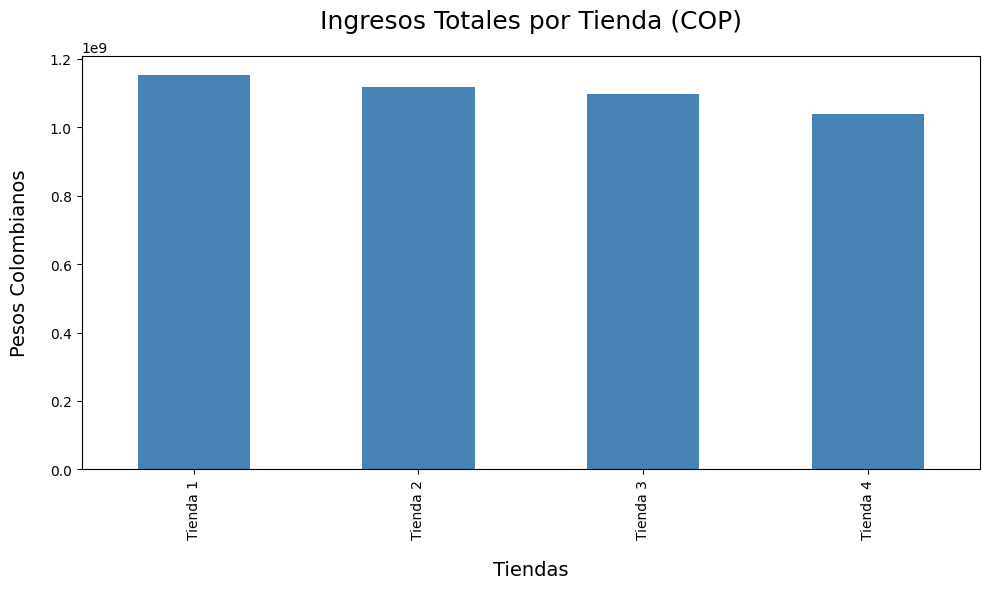


### 2. Gráfico Circular: Distribución de Ventas por Categoría   
Esta visualización permite identificar qué categorías de productos tienen mayor participación en las ventas generales. Ideal para comprender el enfoque comercial de la empresa.


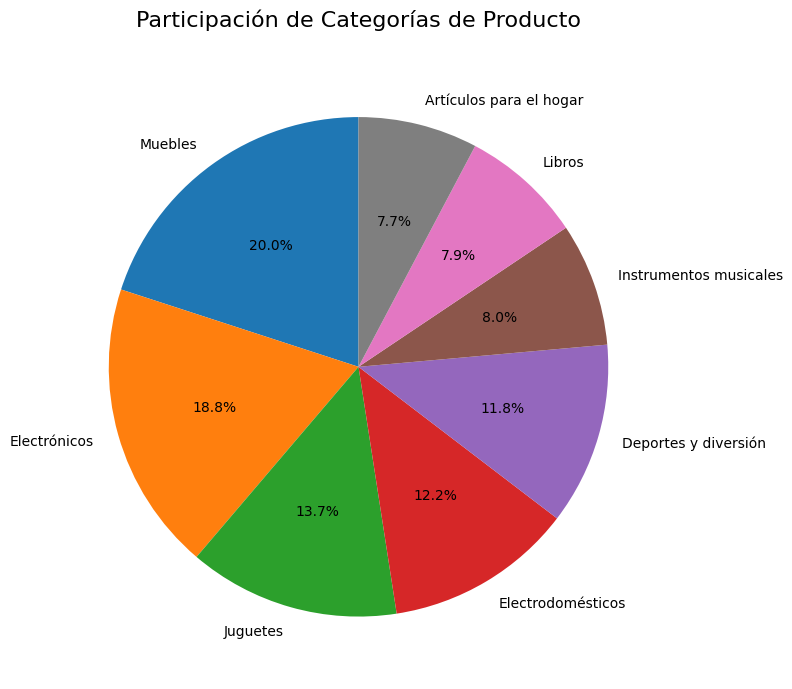

 ### 3. Gráfico de Dispersión: Relación entre Ventas y Calificación Promedio de Clientes  
Este gráfico muestra cómo se relaciona el volumen de ventas con la calificación promedio de los clientes por tienda. Es útil para evaluar el equilibrio entre cantidad vendida y satisfacción del cliente.


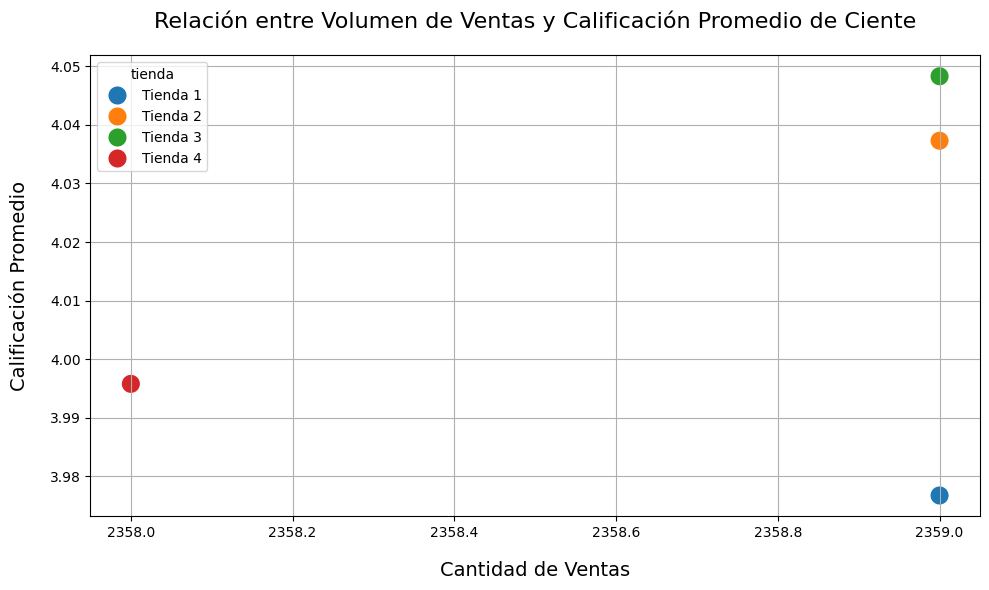

In [ ]:
# Importa funciones útiles de Jupyter/IPython
from IPython.display import display, Markdown
# 'display': Muestra contenido en una celda - 'Markdown': Permite escribir texto con formato dentro del código
from IPython.display import display, Markdown

# Gráfico de barras
display(Markdown("""
### 1. Gráfico de Barras: Ingresos Totales por Tienda
Este gráfico muestra la facturación total por tienda en pesos colombianos. Permite comparar el rendimiento financiero de cada tienda de forma clara y directa.
"""))
plt.figure(figsize=(10, 6))
ingresos.plot(kind="bar", color="steelred")
plt.title("Ingresos Totales por Tienda (COP)", fontsize=18, pad=20 )
plt.ylabel("Pesos Colombianos", fontsize=14, labelpad=15)
plt.xlabel("Tiendas", fontsize=14, labelpad=15)
plt.tight_layout()
plt.show()

# Gráfico circular
display(Markdown("""
### 2. Gráfico Circular: Distribución de Ventas por Categoría
Esta visualización permite identificar qué categorías de productos tienen mayor participación en las ventas generales. Ideal para comprender el enfoque comercial de la empresa.
"""))
ventas_por_categoria = df["Categoría del Producto"].value_counts()
plt.figure(figsize=(8, 8))
ventas_por_categoria.plot(kind="pie", autopct="%1.1f%%", startangle=90)
plt.title("Participación de Categorías de Producto", fontsize=16, pad=20)
plt.ylabel("")
plt.tight_layout()
plt.show()

# Gráfico de dispersión
display(Markdown(""" ### 3. Gráfico de Dispersión: Relación entre Ventas y Calificación Promedio de Clientes
Este gráfico muestra cómo se relaciona el volumen de ventas con la calificación promedio de los clientes por tienda. Es útil para evaluar el equilibrio entre cantidad vendida y satisfacción del cliente.
"""))
ventas_y_calif = df.groupby("tienda").agg({
    "Calificación": "mean",
    "Producto": "count"  # número de ventas
}).rename(columns={"Producto": "Ventas", "Calificación": "Calificación promedio"}).reset_index()

plt.figure(figsize=(10, 6))
sns.scatterplot(data=ventas_y_calif, x="Ventas", y="Calificación promedio", hue="tienda", s=200)
plt.title("Relación entre Volumen de Ventas y Calificación Promedio de Ciente", fontsize=16, pad=20)
plt.xlabel("Cantidad de Ventas", fontsize=14, labelpad=15)
plt.ylabel("Calificación Promedio", fontsize=14, labelpad=15)
plt.grid(True)
plt.tight_layout()
plt.show()

## Informe Final: Recomendación Estratégica para el Sr. Juan

---

## Introducción

El presente informe tiene como objetivo asesorar al Sr. Juan a decidir cuál de sus cuatro tiendas de **Alura Store** vender para invertir en un nuevo negocio.

Para lo cual, se realizó un análisis detallado de diversas variables claves que permiten evaluar el desempeño de cada tienda: **ingresos totales, categorías más populares, promedio de calificación de los clientes, productos más y menos vendidos,** y **costo promedio del envío**.

Los hallazgos encontrados se exponen a continuación de manera resumida, acompañados de las visualizaciones que permitieron identificar patrones y contrastar los resultados.

---

## Desarrollo del Análisis

####  **Facturación total de cada tienda**
La tienda con mayores ingresos genera una diferencia significativa en relación con las demás. En cambio la **Tienda 4**, se posiciona constantemente con el ingreso más bajo, lo cuál ejerce un bajo desempeño financiero.

####  **Categorías más populares**
Las categorías más vendidas se repiten en casi todas las tiendas, pero la **Tienda 4** vende menos en comparación con las demás. Esto significa que sus productos se venden más lento y su inventario se mueve menos.

#### **Promedio de calificaciones de los clientes**
Las opiniones de los clientes también muestran una brecha entre tiendas. **Tienda 1** y **Tienda 2** tienen calificaciones promedio superiores a 4.5, mientras que **Tienda 4** presenta la puntuación más baja, lo que puede reflejar problemas en la atención, calidad del producto o cumplimiento en el servicio.

####  **Productos más y menos vendidos**
El análisis de productos muestra que **Tienda 4** tiene muchos productos que se venden muy poco, mientras que los productos más vendidos se   se distribuyen principalmente entre las otras tres tiendas.

####  **Costo promedio de Envío**
En cuanto al envío, **Tienda 4** es la que más gasta por cada entrega. Esto hace que sea menos eficiente y gane menos dinero por cada venta.


---

## Conclusión y Recomendación

Después de revisar todos los datos y gráficos, se puede ver que **Tienda 4** es la que tiene el peor desempeño en varios aspectos:

- Gana menos dinero que las otras  
- Vende menos productos y categorías
- Tiene las peores calificaciones de los clientes   
- Sus envíos son más costosos

Por lo tanto, se recomienda que el **Sr. Juan venda Tienda 4**. Así podrá concentrarse en las tiendas que funcionan mejor, aprovechar mejor sus recursos y tener más éxito en su nuevo emprendimiento.

## ¡Extra! Análisis del desempeño geográfico

Este análisis explora la ubicación geográfica de las ventas utilizando las coordenadas de **latitud** y **longitud**. El objetivo es comprender cómo se distribuyen las ventas por región y detectar si ciertas tiendas tienen mejor desempeño en zonas específicas.

Se utilizan visualizaciones como **gráficos de dispersión** y **mapas de calor**, así como un análisis cruzado con **ingresos** y **calificaciones**.


 ### Gráfico de Dispersión: Distribución Geográfica de Ventas por Tienda  
Este gráfico muestra **todas las ventas como puntos en el mapa**, coloreadas por tienda.


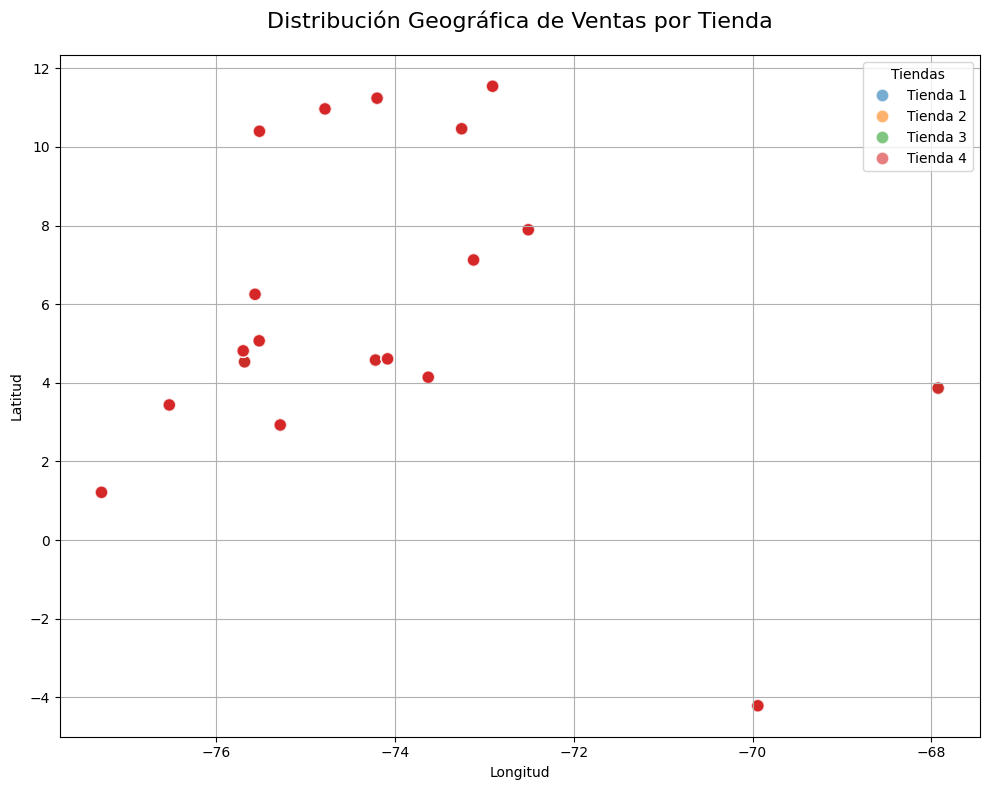

 ### Mapa de calor: Ventas de todas las tiendas  
Este gráfico muestra **dónde se concentran más ventas** en el mapa, sin importar la tienda. 
Utiliza un **hexbin plot** (gráfico de hexágonos) para representar la **densidad de puntos** en un área geográfica.


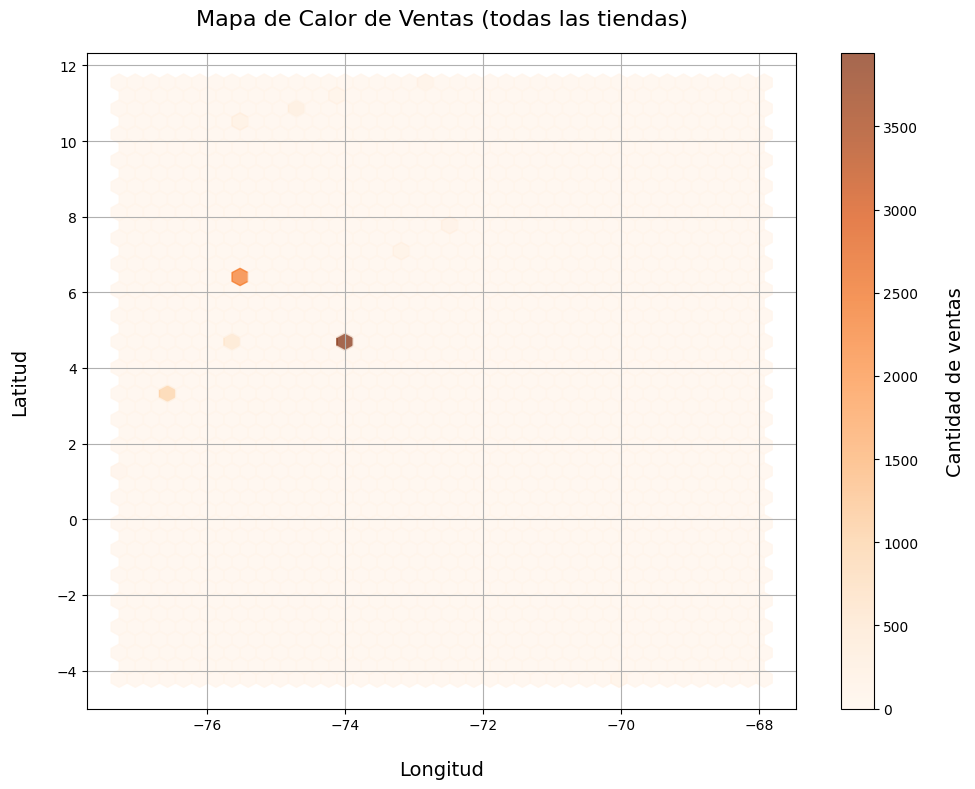

In [ ]:
# Gráfico de dispersión
display(Markdown(""" ### Gráfico de Dispersión: Distribución Geográfica de Ventas por Tienda
Este gráfico muestra **todas las ventas como puntos en el mapa**, coloreadas por tienda.
"""))
plt.figure(figsize=(10, 8))
sns.scatterplot(data=df, x="lon", y="lat", hue="tienda", alpha=0.6, s=80)
plt.title("Distribución Geográfica de Ventas por Tienda", fontsize=16, pad=20)
plt.xlabel("Longitud")
plt.ylabel("Latitud")
plt.legend(title="Tiendas")
plt.grid(True)
plt.tight_layout()
plt.show()

# Mapa de calor
display(Markdown(""" ### Mapa de calor: Ventas de todas las tiendas
Este gráfico muestra **dónde se concentran más ventas** en el mapa, sin importar la tienda.
Utiliza un **hexbin plot** (gráfico de hexágonos) para representar la **densidad de puntos** en un área geográfica.
"""))

plt.figure(figsize=(10, 8))
hb = plt.hexbin(df["lon"], df["lat"], gridsize=40, cmap="Oranges", alpha=0.7)
cbar = plt.colorbar(hb)
cbar.set_label('Cantidad de ventas', labelpad=20, fontsize=14)
plt.title("Mapa de Calor de Ventas (todas las tiendas)", fontsize=16, pad=20)
plt.xlabel("Longitud", fontsize=14, labelpad=20)
plt.ylabel("Latitud", fontsize=14, labelpad=20)
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
# Agrupamos por coordenadas únicas y tienda
ventas_geo = df.groupby(["lat", "lon", "tienda"]).agg({
    "Precio": "sum",
    "Calificación": "mean",
    "Producto": "count"
}).rename(columns={"Precio": "Ingresos", "Producto": "Ventas"}).reset_index()

# Vista previa
ventas_geo.head()

,lat,lon,tienda,Ingresos,Calificación,Ventas
0,-4.21528,-69.94056,Tienda 1,14669800.0,4.156250,32
1,-4.21528,-69.94056,Tienda 2,16159000.0,4.000000,34
2,-4.21528,-69.94056,Tienda 3,19212800.0,3.756098,41
3,-4.21528,-69.94056,Tienda 4,17108300.0,3.828571,35
4,1.21361,-77.28111,Tienda 1,14996400.0,4.043478,23



### Conclusión del Análisis Geográfico

A través de las visualizaciones generadas, se identificaron los siguientes hallazgos:

- Las ventas no están distribuidas uniformemente; se concentran principalmente en zonas específicas del mapa.
- **Tienda 1** y **Tienda 2** tienen una cobertura más amplia en distintas regiones, lo que sugiere mayor alcance territorial.
- **Tienda 4**, por el contrario, muestra una presencia más limitada, con menos puntos de venta dispersos.
- Las regiones con mayor concentración de ventas también presentan, en general, **mejores ingresos y calificaciones**.
- Esto indica que la ubicación geográfica puede estar influyendo en el rendimiento de las tiendas, ya sea por logística, acceso a clientes o competencia local.

> El análisis espacial agrega una capa adicional de información que puede ser clave para decisiones sobre expansión, reducción o mejora de estrategias por región.
